### Importação dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


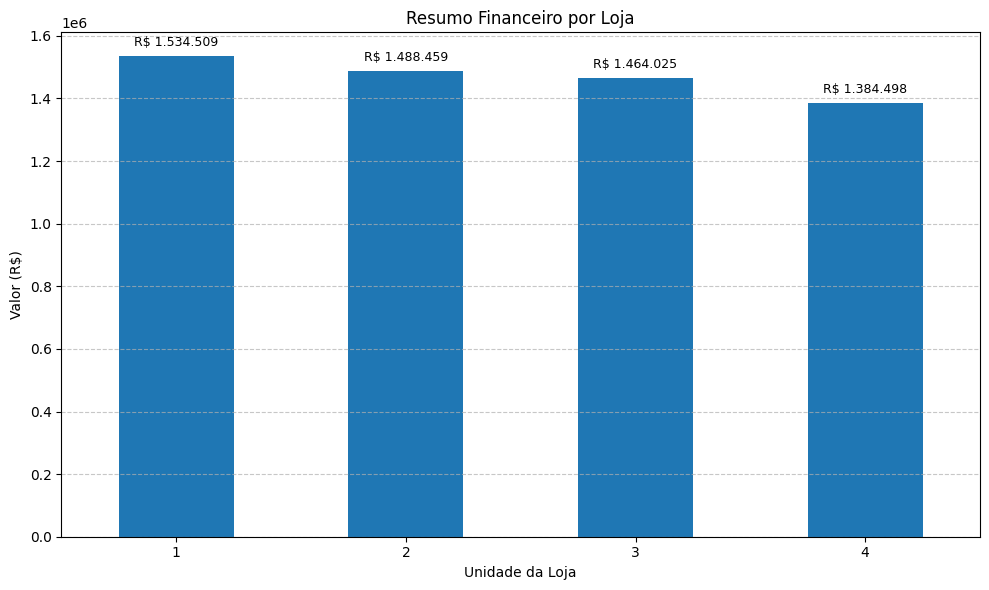

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
loja['Unidade_loja'] = 1
loja2['Unidade_loja'] = 2
loja3['Unidade_loja'] = 3
loja4['Unidade_loja'] = 4

merje_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

merje_lojas['Lucro_liquido'] = merje_lojas['Preço'] - merje_lojas['Frete']
dados_resumo = merje_lojas.groupby('Unidade_loja')['Preço'].sum()

# Criando gráfico de barras
ax = dados_resumo.plot(kind='bar', figsize=(10, 6), colormap='tab10')
plt.title('Resumo Financeiro por Loja')
plt.ylabel('Valor (R$)')
plt.xlabel('Unidade da Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando valores nos gráficos
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


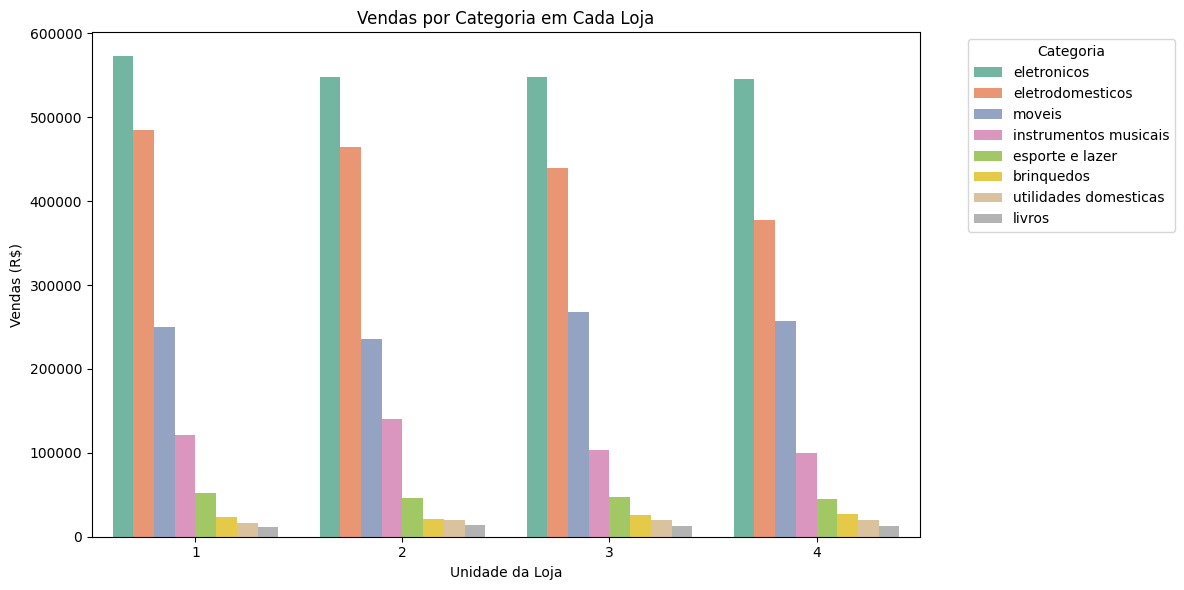

In [58]:
import seaborn as sns
vendas_categoria = merje_lojas.groupby(['Unidade_loja','Categoria do Produto', 'Vendedor', 'Local da compra', 'Data da Compra'])['Preço'].sum().reset_index()
total_por_categoria = vendas_categoria.groupby(['Unidade_loja','Categoria do Produto'])['Preço'].sum().reset_index().sort_values('Preço', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=total_por_categoria,
    x='Unidade_loja',
    y='Preço',
    hue='Categoria do Produto',
    palette='Set2'
)
plt.title('Vendas por Categoria em Cada Loja')
plt.ylabel('Vendas (R$)')
plt.xlabel('Unidade da Loja')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [39]:
merje_lojas.groupby('Unidade_loja')['Avaliação da compra'].mean()


,Avaliação da compra
Unidade_loja,
1,3.976685
2,4.037304
3,4.048326
4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [45]:
merje_lojas.groupby(['Categoria do Produto'])['Preço'].sum().sort_values(ascending=False)


,Preço
Categoria do Produto,
eletronicos,2214099.72
eletrodomesticos,1766337.03
moveis,1010214.00
instrumentos musicais,465029.67
esporte e lazer,190635.39
brinquedos,98140.86
utilidades domesticas,76773.38
livros,50260.74


# 5. Frete Médio por Loja


In [47]:
merje_lojas.groupby(['Unidade_loja'])['Frete'].mean().sort_values(ascending=False)

,Frete
Unidade_loja,
1,34.691805
2,33.621941
3,33.074464
4,31.278997


# **RELATÓRIO**

Com base na análise dos dados,  a Loja 4 apresenta o desempenho mais baixo, os principais fatores são:

*   Menor faturamento total entre as lojas.
*   Baixa participação em  categorias de maior retorno financeiro como as de eletrodomestico.
*   Avaliação média mais baixa que a outras.

Recomenda-se a venda da Loja 4, por se tratar da unidade com menor lucro e pior desempenho nos aspectos avaliados.